In [2]:
run /home/alec/galvanize/capstone/capstone_1/src/suicide_eda.py

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
plt.style.use('ggplot')

In [4]:
cumulative_happiness

,country,cumulative_happiness_score
2,Denmark,7.542833
3,Norway,7.537833
0,Switzerland,7.524000
1,Iceland,7.519333
5,Finland,7.515833
...,...,...
78,Bulgaria,4.551833
75,Armenia,4.386000
77,Sri Lanka,4.372333
73,Ukraine,4.369500


In [5]:
suicides

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,hdi_for_year,gdp_for_year_$,gdp_per_capita_$,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [6]:
suicides.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [7]:
def compare_suicide_rates(country1, country2):
    country1_mask = suicides['country'] == country1
    country1_df = suicides[country1_mask]
    country1_df_suicide_rate_over_time = country1_df[['year','suicides/100k_pop']]
    country1_df_total_suicide_rate = country1_df_suicide_rate_over_time.groupby(['year']).sum()
    
    country2_mask = suicides['country'] == country2
    country2_df = suicides[country2_mask]
    country2_df_suicide_rate_over_time = country2_df[['year','suicides/100k_pop']]
    country2_df_total_suicide_rate = country2_df_suicide_rate_over_time.groupby(['year']).sum()
    
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(country1_df_total_suicide_rate['suicides/100k_pop'], label=f"Suicides/100k in {country1}")
    ax.plot(country2_df_total_suicide_rate['suicides/100k_pop'], label=f"Suicides/100k in {country2}")
    ax.legend()
    plt.show()

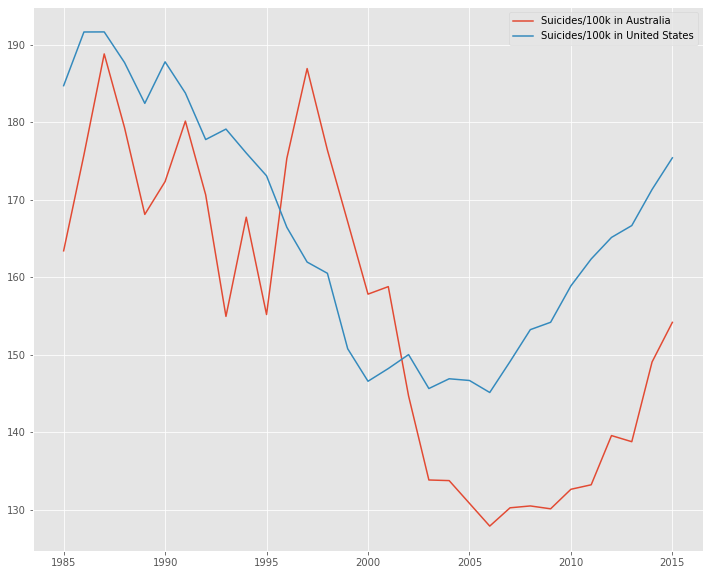

In [8]:
compare_suicide_rates('Australia', 'United States')

In [9]:
country_and_suicide_rate = suicides[['country','year','suicides/100k_pop']]

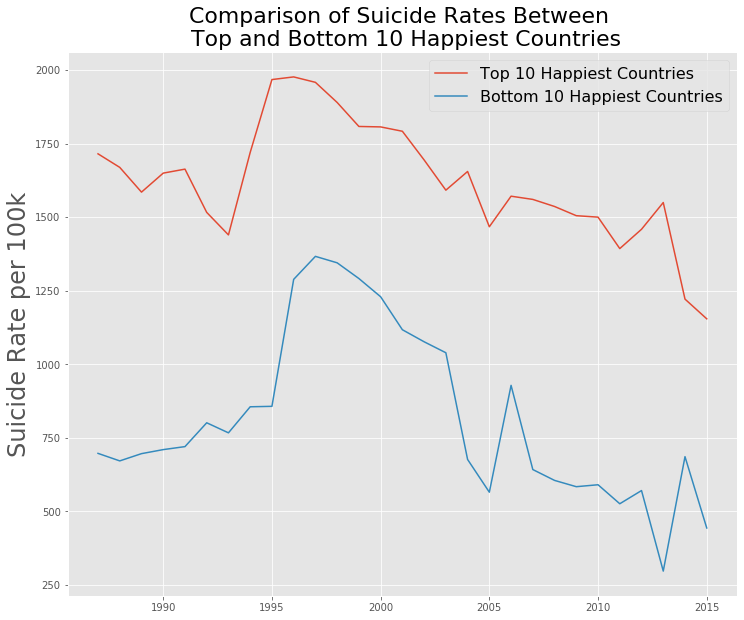

In [73]:
#Throwing out first two years and last year#

top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
top_10_country_mask = country_and_suicide_rate['country'].isin(top_10_country_list)
top_10_country = country_and_suicide_rate.loc[top_10_country_mask, :]
top_10_sum = top_10_country.groupby(['year']).sum()[2:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
bottom_10_country_mask = country_and_suicide_rate['country'].isin(bottom_10_country_list)
bottom_10_country = country_and_suicide_rate.loc[bottom_10_country_mask, :]
bottom_10_sum = bottom_10_country.groupby(['year']).sum()[2:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(top_10_sum['suicides/100k_pop'], label='Top 10 Happiest Countries')
ax.plot(bottom_10_sum['suicides/100k_pop'], label='Bottom 10 Happiest Countries')
ax.set_title('Comparison of Suicide Rates Between \n Top and Bottom 10 Happiest Countries', size=22)
ax.set_ylabel("Suicide Rate per 100k", size=24)
#ax.set_xlabel("Time")
ax.legend(fontsize=16)
plt.savefig('/home/alec/galvanize/capstone/capstone_1/images/Overall_TopBottom_Compare_Before_Adjustment')
plt.show()

In [11]:
sex_and_suicide_rate = suicides[['country','year','sex','suicides/100k_pop']]
sex_and_suicide_rate

,country,year,sex,suicides/100k_pop
0,Albania,1987,male,6.71
1,Albania,1987,male,5.19
2,Albania,1987,female,4.83
3,Albania,1987,male,4.59
4,Albania,1987,male,3.28
...,...,...,...,...
27815,Uzbekistan,2014,female,2.96
27816,Uzbekistan,2014,female,2.58
27817,Uzbekistan,2014,male,2.17
27818,Uzbekistan,2014,female,1.67


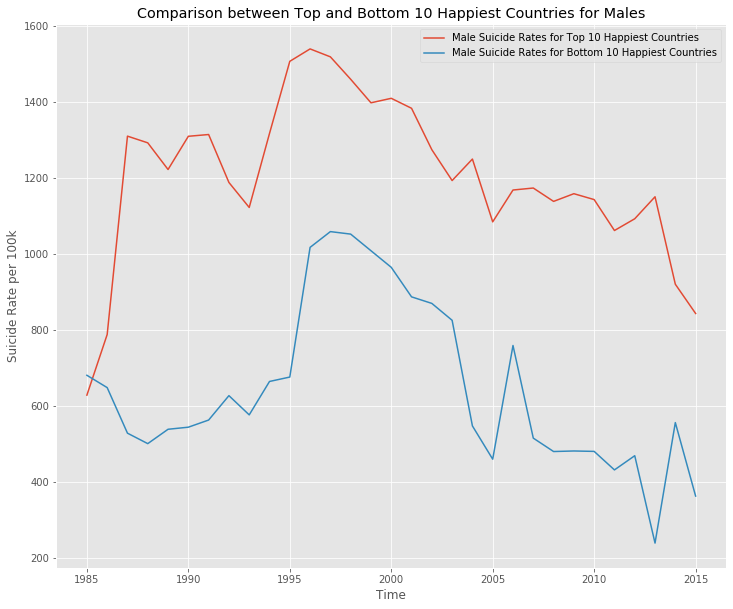

In [12]:
##Combine Female and Male into one subplot##Don't use this 

male_mask = sex_and_suicide_rate['sex'] == 'male'
male_country_and_suicide_rate = sex_and_suicide_rate[male_mask]

top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
male_top_10_country_mask = male_country_and_suicide_rate['country'].isin(top_10_country_list)
male_top_10_country = male_country_and_suicide_rate.loc[male_top_10_country_mask, :]
male_top_10_sum = male_top_10_country.groupby(['year']).sum()[:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
male_bottom_10_country_mask = male_country_and_suicide_rate['country'].isin(bottom_10_country_list)
male_bottom_10_country = male_country_and_suicide_rate.loc[male_bottom_10_country_mask, :]
male_bottom_10_sum = male_bottom_10_country.groupby(['year']).sum()[:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(male_top_10_sum['suicides/100k_pop'], label='Male Suicide Rates for Top 10 Happiest Countries')
ax.plot(male_bottom_10_sum['suicides/100k_pop'], label='Male Suicide Rates for Bottom 10 Happiest Countries')
ax.set_title('Comparison between Top and Bottom 10 Happiest Countries for Males')
ax.set_ylabel("Suicide Rate per 100k")
ax.set_xlabel("Time")
ax.legend()
plt.show()

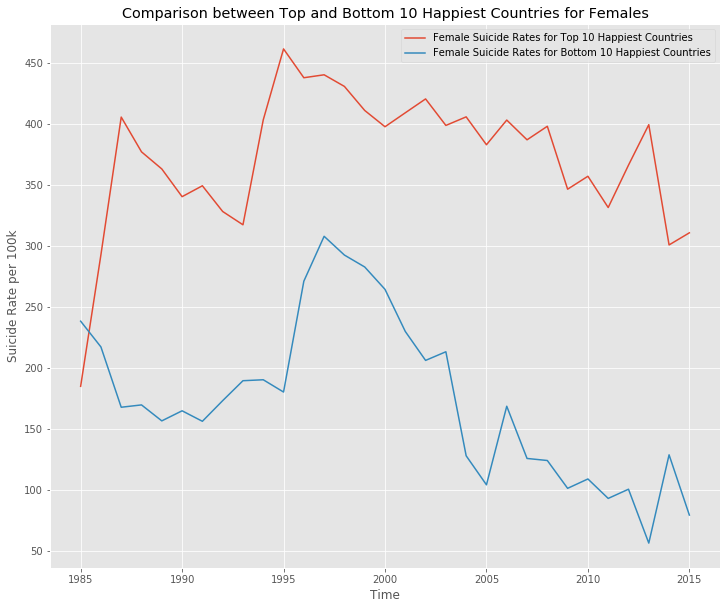

In [13]:
##Combine Female and Male into one subplot##Don't use this

female_mask = sex_and_suicide_rate['sex'] == 'female'
female_country_and_suicide_rate = sex_and_suicide_rate[female_mask]

top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
female_top_10_country_mask = female_country_and_suicide_rate['country'].isin(top_10_country_list)
female_top_10_country = female_country_and_suicide_rate.loc[female_top_10_country_mask, :]
female_top_10_sum = female_top_10_country.groupby(['year']).sum()[:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
female_bottom_10_country_mask = female_country_and_suicide_rate['country'].isin(bottom_10_country_list)
female_bottom_10_country = female_country_and_suicide_rate.loc[female_bottom_10_country_mask, :]
female_bottom_10_sum = female_bottom_10_country.groupby(['year']).sum()[:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(female_top_10_sum['suicides/100k_pop'], label='Female Suicide Rates for Top 10 Happiest Countries')
ax.plot(female_bottom_10_sum['suicides/100k_pop'], label='Female Suicide Rates for Bottom 10 Happiest Countries')
ax.set_title('Comparison between Top and Bottom 10 Happiest Countries for Females')
ax.set_ylabel("Suicide Rate per 100k")
ax.set_xlabel("Time")
ax.legend()
plt.show()

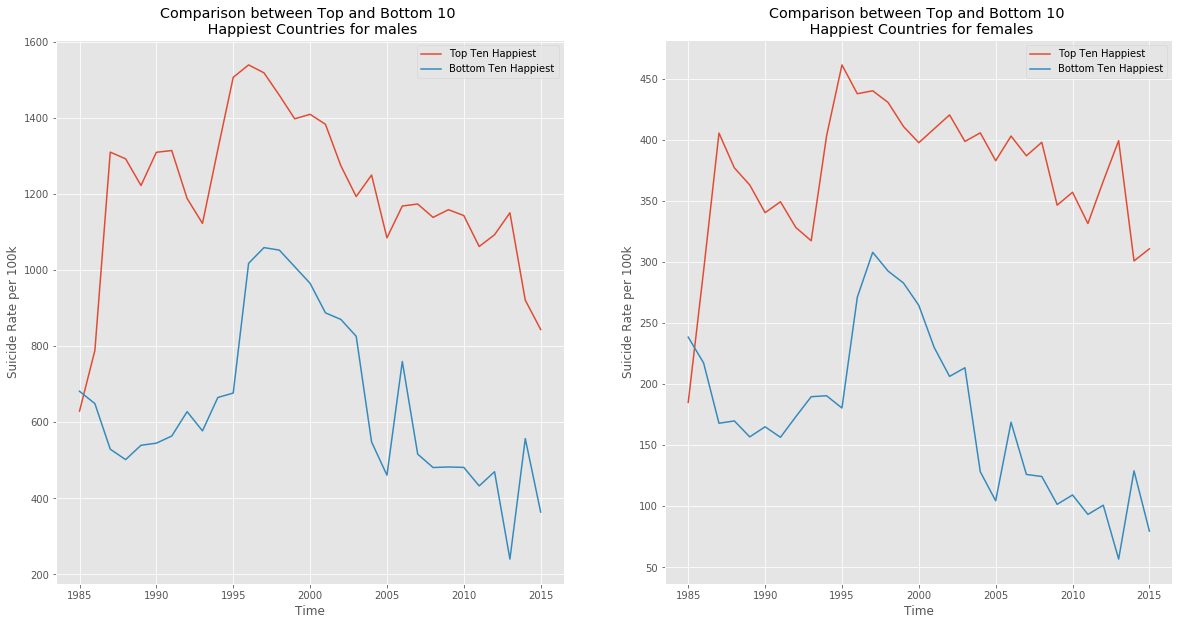

In [14]:
###Putting The Above Two Graphs Into One Plot With A Function####Don't Use this in the presentation####

def suicide_by_sex(sex):
    sex_mask = sex_and_suicide_rate['sex'] == sex
    sex_country_and_suicide_rate = sex_and_suicide_rate[sex_mask]

    top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands',
                           'Canada','Sweden','New Zealand','Australia']
    sex_top_10_country_mask = sex_country_and_suicide_rate['country'].isin(top_10_country_list)
    sex_top_10_country = sex_country_and_suicide_rate.loc[sex_top_10_country_mask, :]
    sex_top_10_sum = sex_top_10_country.groupby(['year']).sum()[:-1]

    bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa',
                              'Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
    sex_bottom_10_country_mask = sex_country_and_suicide_rate['country'].isin(bottom_10_country_list)
    sex_bottom_10_country = sex_country_and_suicide_rate.loc[sex_bottom_10_country_mask, :]
    sex_bottom_10_sum = sex_bottom_10_country.groupby(['year']).sum()[:-1]
    
    return sex_top_10_sum, sex_bottom_10_sum

def make_sex_graphs(list_of_sexes):
    list_of_sex_graphs = [suicide_by_sex(i) for i in list_of_sexes]
    return list_of_sex_graphs

list_of_sexes=['male', 'female']
m, f = make_sex_graphs(list_of_sexes)


fig, axs = plt.subplots(1,2, figsize=(20,10))
axs=axs.flatten()
idx=0
for i,df in enumerate([m, f]):
    axs[i].plot(df[0]['suicides/100k_pop'], label='Top Ten Happiest')
    axs[i].plot(df[1]['suicides/100k_pop'], label='Bottom Ten Happiest')
    axs[i].set_title(f'Comparison between Top and Bottom 10 \n Happiest Countries for {list_of_sexes[idx]}s')
    axs[i].set_ylabel("Suicide Rate per 100k")
    axs[i].set_xlabel("Time")
    axs[i].legend()
    idx+=1

In [15]:
#Looking at suicide relationship with age in happy vs less happy countries
suicides.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [16]:
age_and_suicide_rate = suicides[['country','year','age','suicides/100k_pop']]
age_and_suicide_rate

,country,year,age,suicides/100k_pop
0,Albania,1987,15-24 years,6.71
1,Albania,1987,35-54 years,5.19
2,Albania,1987,15-24 years,4.83
3,Albania,1987,75+ years,4.59
4,Albania,1987,25-34 years,3.28
...,...,...,...,...
27815,Uzbekistan,2014,35-54 years,2.96
27816,Uzbekistan,2014,75+ years,2.58
27817,Uzbekistan,2014,5-14 years,2.17
27818,Uzbekistan,2014,5-14 years,1.67


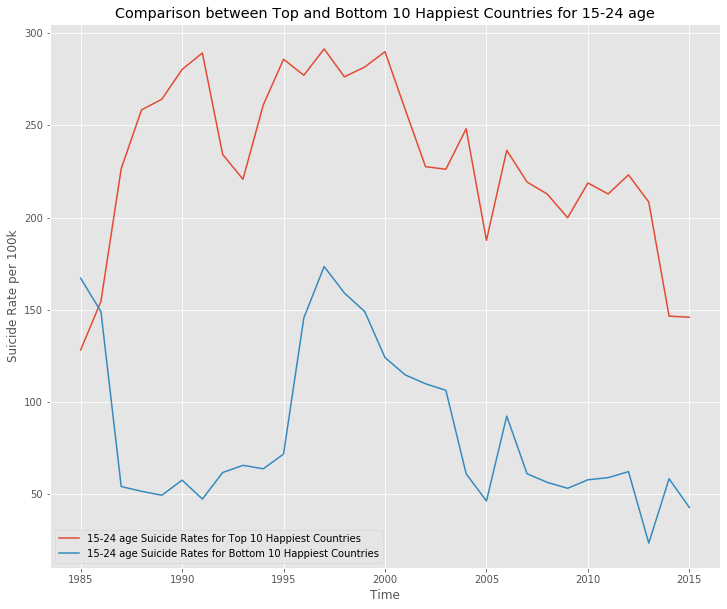

In [17]:
##Don't Need this since I made the updated sub plot down below##

fif_four_mask = age_and_suicide_rate['age'] == '15-24 years'
fif_four_country_and_suicide_rate = sex_and_suicide_rate[fif_four_mask]

top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
fif_four_top_10_country_mask = fif_four_country_and_suicide_rate['country'].isin(top_10_country_list)
fif_four_top_10_country = fif_four_country_and_suicide_rate.loc[fif_four_top_10_country_mask, :]
fif_four_top_10_sum = fif_four_top_10_country.groupby(['year']).sum()[:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
fif_four_bottom_10_country_mask = fif_four_country_and_suicide_rate['country'].isin(bottom_10_country_list)
fif_four_bottom_10_country = fif_four_country_and_suicide_rate.loc[fif_four_bottom_10_country_mask, :]
fif_four_bottom_10_sum = fif_four_bottom_10_country.groupby(['year']).sum()[:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(fif_four_top_10_sum['suicides/100k_pop'], label='15-24 age Suicide Rates for Top 10 Happiest Countries')
ax.plot(fif_four_bottom_10_sum['suicides/100k_pop'], label='15-24 age Suicide Rates for Bottom 10 Happiest Countries')
ax.set_title('Comparison between Top and Bottom 10 Happiest Countries for 15-24 age')
ax.set_ylabel("Suicide Rate per 100k")
ax.set_xlabel("Time")
ax.legend()
plt.show()

In [18]:
##Don't Really Need This##This will produce one individual graph for any given age group##

def age_suicide_comparison(age):
    my_mask = age_and_suicide_rate['age'] == age
    my_age_and_suicide_rate = age_and_suicide_rate[my_mask]

    top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
    age_top_10_country_mask = my_age_and_suicide_rate['country'].isin(top_10_country_list)
    age_top_10_country = my_age_and_suicide_rate.loc[age_top_10_country_mask, :]
    age_top_10_sum = age_top_10_country.groupby(['year']).sum()[:-1]

    bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
    age_bottom_10_country_mask = my_age_and_suicide_rate['country'].isin(bottom_10_country_list)
    age_bottom_10_country = my_age_and_suicide_rate.loc[age_bottom_10_country_mask, :]
    age_bottom_10_sum = age_bottom_10_country.groupby(['year']).sum()[:-1]

    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(age_top_10_sum['suicides/100k_pop'], label=f'{age} age Suicide Rates for Top 10 Happiest Countries')
    ax.plot(age_bottom_10_sum['suicides/100k_pop'], label=f'{age} age Suicide Rates for Bottom 10 Happiest Countries')
    ax.set_title(f'Comparison between Top and Bottom 10 Happiest Countries for {age} age')
    ax.set_ylabel("Suicide Rate per 100k")
    ax.set_xlabel("Time")
    ax.legend()
    plt.show()

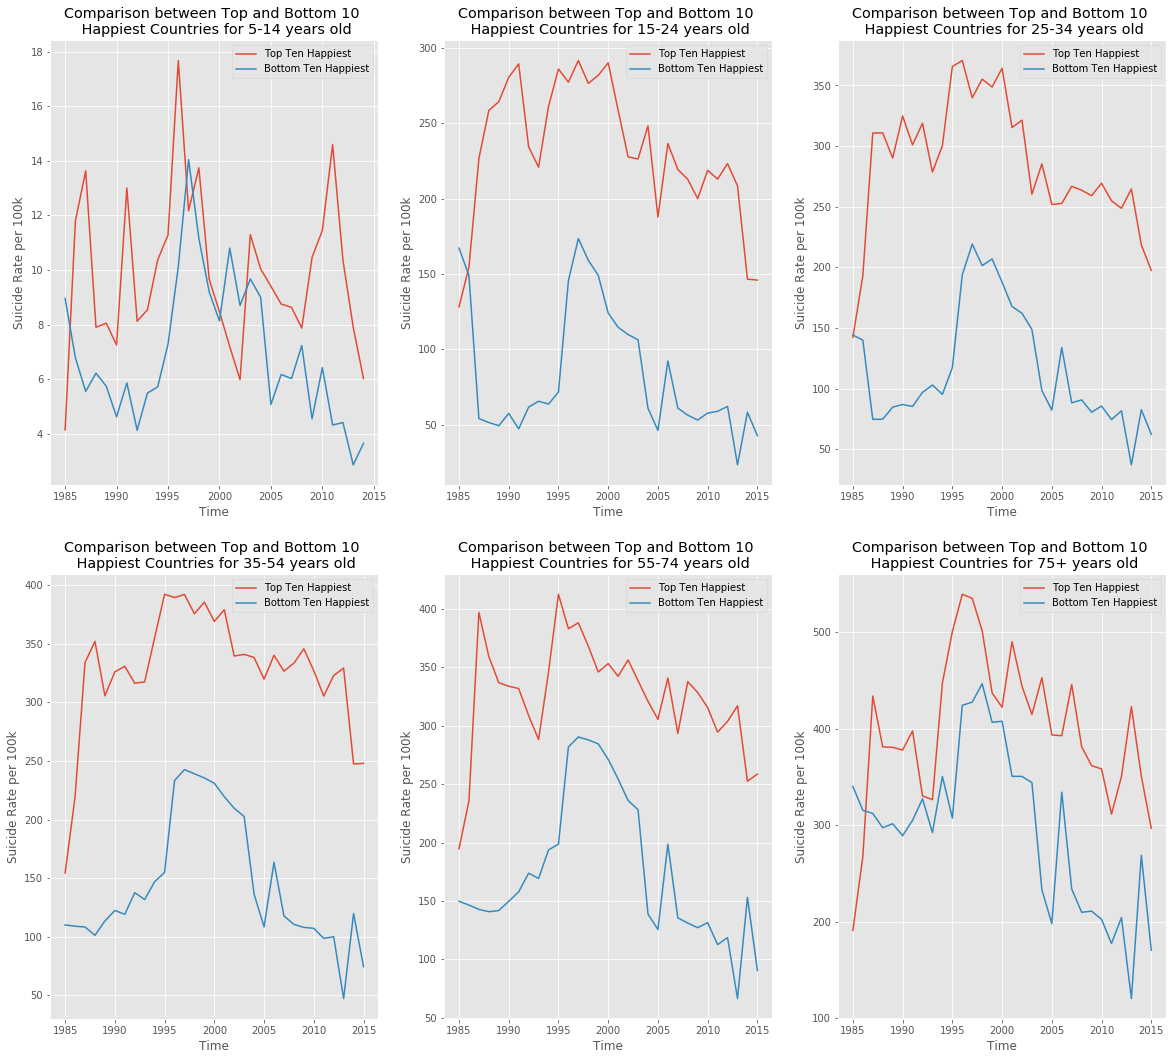

In [19]:
def age_top_and_bottom(age):
    my_mask = age_and_suicide_rate['age'] == age
    my_age_and_suicide_rate = age_and_suicide_rate[my_mask]

    top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands',
                           'Canada','Sweden','New Zealand','Australia']
    age_top_10_country_mask = my_age_and_suicide_rate['country'].isin(top_10_country_list)
    age_top_10_country = my_age_and_suicide_rate.loc[age_top_10_country_mask, :]
    age_top_10_sum = age_top_10_country.groupby(['year']).sum()[:-1]

    bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria',
                              'Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
    age_bottom_10_country_mask = my_age_and_suicide_rate['country'].isin(bottom_10_country_list)
    age_bottom_10_country = my_age_and_suicide_rate.loc[age_bottom_10_country_mask, :]
    age_bottom_10_sum = age_bottom_10_country.groupby(['year']).sum()[:-1]
    
    return age_top_10_sum, age_bottom_10_sum

def make_age_graphs(list_of_ages):
    list_of_graphs = [age_top_and_bottom(i) for i in list_of_suicide_ages]
    return list_of_graphs

list_of_suicide_ages=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
age5, age15, age25, age35, age55, age75 = make_age_graphs(list_of_suicide_ages)


fig, axs = plt.subplots(2,3, figsize=(20,18))
axs=axs.flatten()
idx=0
for i,df in enumerate([age5, age15, age25, age35, age55, age75]):
    axs[i].plot(df[0]['suicides/100k_pop'], label='Top Ten Happiest')
    axs[i].plot(df[1]['suicides/100k_pop'], label='Bottom Ten Happiest')
    axs[i].set_title(f'Comparison between Top and Bottom 10 \n Happiest Countries for {list_of_suicide_ages[idx]} old')
    axs[i].set_ylabel("Suicide Rate per 100k")
    axs[i].set_xlabel("Time")
    axs[i].legend()
    idx+=1

In [20]:
#Adjust above graphs by the count of each country per year. I'm concerned that not all countries have the same
#amount of data/year. IE happy countries might just be counting more data compared to other countries.
#There should be 120 total/given year. 6 age brackers * two sexes * 10 countries

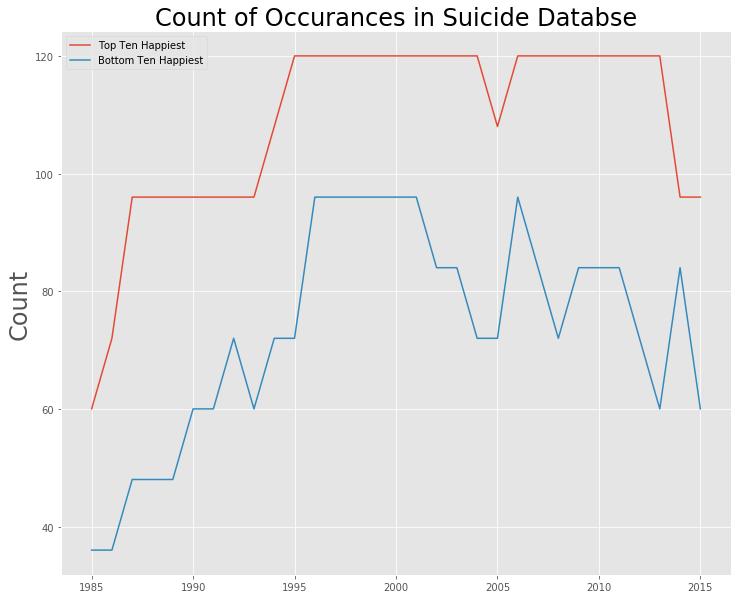

In [30]:
#USE#

def count_of_countries_per_year(top_10_country_list, bottom_10_country_list, df):
    top_10_country_mask = df['country'].isin(top_10_country_list)
    top_10_country_df = df.loc[top_10_country_mask, :]
    top_10_country_df_count = top_10_country_df.groupby(['year']).count()[:-1]
    
    bottom_10_country_mask = df['country'].isin(bottom_10_country_list)
    bottom_10_country_df = df.loc[bottom_10_country_mask, :]
    bottom_10_country_df_count = bottom_10_country_df.groupby(['year']).count()[:-1]
    
    return top_10_country_df_count, bottom_10_country_df_count

df = age_and_suicide_rate
top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland',
                       'Netherlands','Canada','Sweden','New Zealand','Australia']
bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa',
                          'Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']

top, bottom = count_of_countries_per_year(top_10_country_list, bottom_10_country_list, df)

fig, ax = plt.subplots(figsize=(12,10))

ax.plot(top['country'], label='Top Ten Happiest')
ax.plot(bottom['country'], label='Bottom Ten Happiest')
ax.set_title('Count of Occurances in Suicide Databse', size=24)
ax.set_ylabel("Count", size=24)
#ax.set_xlabel("Time")
ax.legend()
plt.savefig('/home/alec/galvanize/capstone/capstone_1/images/count_graph')
plt.show()

In [22]:
##The above graph shows that the data might be skewed to show that countries that are happier will have higher
#suicide rates simply because there is more data to count

#Don't redo above graphs, will be good for story telling on how I made the new graphs.

In [23]:
#Inflation Constant?
top_inflation_constant = 120/top
top_inflation_constant

,country,age,suicides/100k_pop
year,,,
1985,2.000000,2.000000,2.000000
1986,1.666667,1.666667,1.666667
1987,1.250000,1.250000,1.250000
1988,1.250000,1.250000,1.250000
1989,1.250000,1.250000,1.250000
1990,1.250000,1.250000,1.250000
1991,1.250000,1.250000,1.250000
1992,1.250000,1.250000,1.250000
1993,1.250000,1.250000,1.250000


In [24]:
#Inflation Constant?
bottom_inflation_constant = 120/bottom
bottom_inflation_constant

,country,age,suicides/100k_pop
year,,,
1985,3.333333,3.333333,3.333333
1986,3.333333,3.333333,3.333333
1987,2.500000,2.500000,2.500000
1988,2.500000,2.500000,2.500000
1989,2.500000,2.500000,2.500000
1990,2.000000,2.000000,2.000000
1991,2.000000,2.000000,2.000000
1992,1.666667,1.666667,1.666667
1993,2.000000,2.000000,2.000000


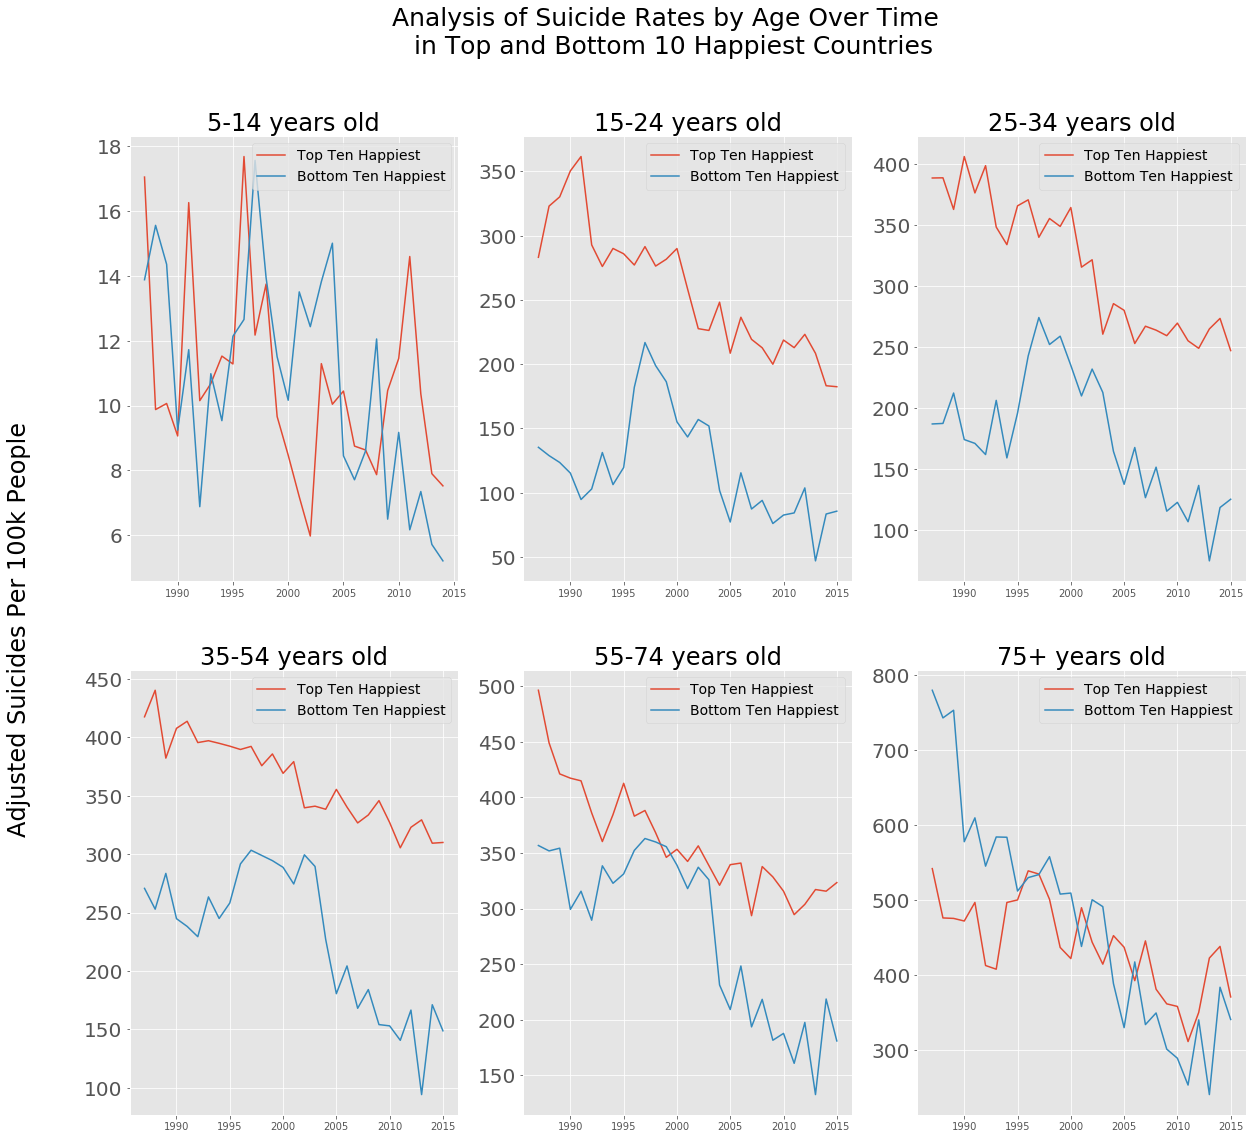

In [63]:
#Adjusting Age Subplot by the Count
#USE
def age_top_and_bottom(age):
    my_mask = age_and_suicide_rate['age'] == age
    my_age_and_suicide_rate = age_and_suicide_rate[my_mask]

    top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands',
                           'Canada','Sweden','New Zealand','Australia']
    age_top_10_country_mask = my_age_and_suicide_rate['country'].isin(top_10_country_list)
    age_top_10_country = my_age_and_suicide_rate.loc[age_top_10_country_mask, :]
    age_top_10_sum = age_top_10_country.groupby(['year']).sum()[2:-1]

    bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria',
                              'Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
    age_bottom_10_country_mask = my_age_and_suicide_rate['country'].isin(bottom_10_country_list)
    age_bottom_10_country = my_age_and_suicide_rate.loc[age_bottom_10_country_mask, :]
    age_bottom_10_sum = age_bottom_10_country.groupby(['year']).sum()[2:-1]
    
    return age_top_10_sum, age_bottom_10_sum

def make_age_graphs(list_of_ages):
    list_of_graphs = [age_top_and_bottom(i) for i in list_of_suicide_ages]
    return list_of_graphs

list_of_suicide_ages=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
age5, age15, age25, age35, age55, age75 = make_age_graphs(list_of_suicide_ages)


fig, axs = plt.subplots(2,3, figsize=(20,18))
axs=axs.flatten()
idx=0
for i,df in enumerate([age5, age15, age25, age35, age55, age75]):
    axs[i].plot(df[0]['suicides/100k_pop']*top_inflation_constant['suicides/100k_pop'], 
                label='Top Ten Happiest')
    axs[i].plot(df[1]['suicides/100k_pop']*bottom_inflation_constant['suicides/100k_pop'], 
                label='Bottom Ten Happiest')
    axs[i].set_title(f'{list_of_suicide_ages[idx]} old', size=24)
    #axs[i].set_ylabel("Suicide Rate per 100k")
    #axs[i].set_xlabel("Time")
    axs[i].legend(fontsize=14)
    axs[i].yaxis.set_tick_params(labelsize=20)
    idx+=1
fig.suptitle('Analysis of Suicide Rates by Age Over Time \n in Top and Bottom 10 Happiest Countries', size=25)
fig.text(0.04, 0.5, 'Adjusted Suicides Per 100k People', va='center', rotation='vertical', fontsize=24)
#fig.text(0.5, 0.04, 'Time', ha='center', va='center', fontsize=24)
plt.savefig('/home/alec/galvanize/capstone/capstone_1/images/suicide_by_age_with_adjustment')
plt.show()

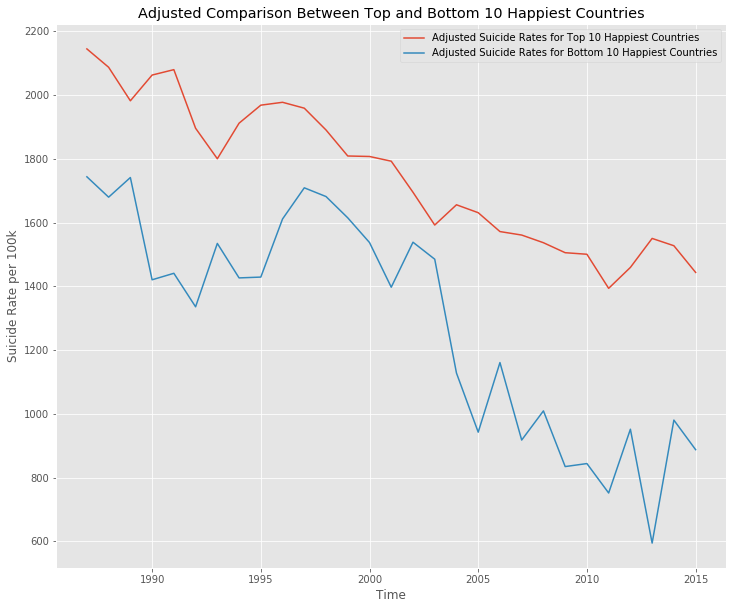

In [26]:
#Adjusting the total comparison of suicide rates of happy vs less happy by count
#I don't think I'll actually need this one for presentation
top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
adjusted_top_10_country_mask = country_and_suicide_rate['country'].isin(top_10_country_list)
adjusted_top_10_country = country_and_suicide_rate.loc[adjusted_top_10_country_mask, :]
adjusted_top_10_sum = adjusted_top_10_country.groupby(['year']).sum()[2:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
adjusted_bottom_10_country_mask = country_and_suicide_rate['country'].isin(bottom_10_country_list)
adjusted_bottom_10_country = country_and_suicide_rate.loc[adjusted_bottom_10_country_mask, :]
adjusted_bottom_10_sum = bottom_10_country.groupby(['year']).sum()[2:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(adjusted_top_10_sum['suicides/100k_pop']*top_inflation_constant['suicides/100k_pop'], 
        label='Adjusted Suicide Rates for Top 10 Happiest Countries')
ax.plot(adjusted_bottom_10_sum['suicides/100k_pop']*bottom_inflation_constant['suicides/100k_pop'], 
        label='Adjusted Suicide Rates for Bottom 10 Happiest Countries')
ax.set_title('Adjusted Comparison Between Top and Bottom 10 Happiest Countries')
ax.set_ylabel("Suicide Rate per 100k")
ax.set_xlabel("Time")
ax.legend()
plt.show()

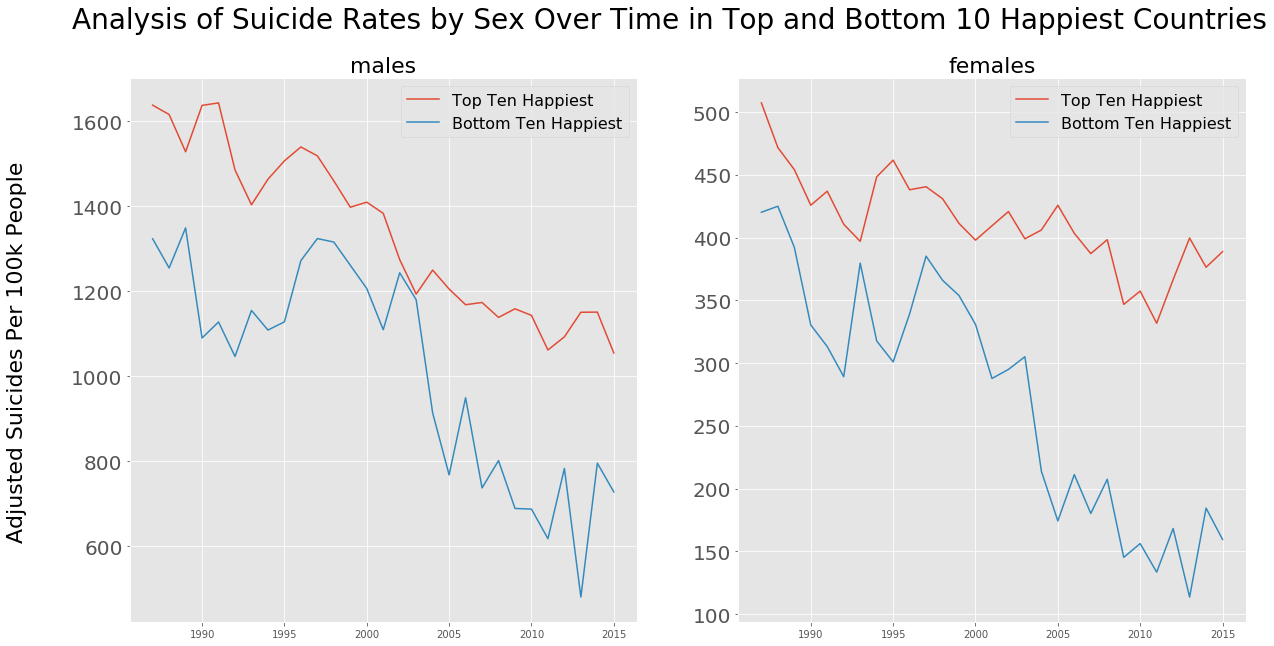

In [62]:
#Sex Graph Adjusted for Count
#USE#

def suicide_by_sex(sex):
    sex_mask = sex_and_suicide_rate['sex'] == sex
    sex_country_and_suicide_rate = sex_and_suicide_rate[sex_mask]

    top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands',
                           'Canada','Sweden','New Zealand','Australia']
    sex_top_10_country_mask = sex_country_and_suicide_rate['country'].isin(top_10_country_list)
    sex_top_10_country = sex_country_and_suicide_rate.loc[sex_top_10_country_mask, :]
    sex_top_10_sum = sex_top_10_country.groupby(['year']).sum()[2:-1]

    bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa',
                              'Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
    sex_bottom_10_country_mask = sex_country_and_suicide_rate['country'].isin(bottom_10_country_list)
    sex_bottom_10_country = sex_country_and_suicide_rate.loc[sex_bottom_10_country_mask, :]
    sex_bottom_10_sum = sex_bottom_10_country.groupby(['year']).sum()[2:-1]
    
    return sex_top_10_sum, sex_bottom_10_sum

def make_sex_graphs(list_of_sexes):
    list_of_sex_graphs = [suicide_by_sex(i) for i in list_of_sexes]
    return list_of_sex_graphs

list_of_sexes=['male', 'female']
m_adjusted_for_count, f_adjusted_for_count = make_sex_graphs(list_of_sexes)


fig, axs = plt.subplots(1,2, figsize=(20,10))
axs=axs.flatten()
idx=0
for i,df in enumerate([m_adjusted_for_count, f_adjusted_for_count]):
    axs[i].plot(df[0]['suicides/100k_pop']*top_inflation_constant['suicides/100k_pop'], 
                label='Top Ten Happiest')
    axs[i].plot(df[1]['suicides/100k_pop']*bottom_inflation_constant['suicides/100k_pop'], 
                label='Bottom Ten Happiest')
    axs[i].set_title(f'{list_of_sexes[idx]}s', fontsize=22)
    #axs[i].set_ylabel("Adjusted Suicide Rate per 100k")
    #axs[i].set_xlabel("Time")
    axs[i].legend(fontsize=16)
    axs[i].yaxis.set_tick_params(labelsize=20)
    idx+=1
fig.suptitle('Analysis of Suicide Rates by Sex Over Time in Top and Bottom 10 Happiest Countries', size=28)
fig.text(0.04, 0.5, 'Adjusted Suicides Per 100k People', va='center', rotation='vertical', fontsize=22)
#fig.text(0.5, 0.04, 'Time', ha='center', va='center', fontsize=24)
plt.savefig('/home/alec/galvanize/capstone/capstone_1/images/suicide_by_sex_with_adjustment')
plt.show()

In [28]:
#In the presentation, instead of doing a side by side for every graph where I compare the original graph to the 
#Adjusted graph, maybe I'll just do it once for the main happiness graph and then talk about how the adjustment
#Converged all the data overall and then continue to only show the adjusted data

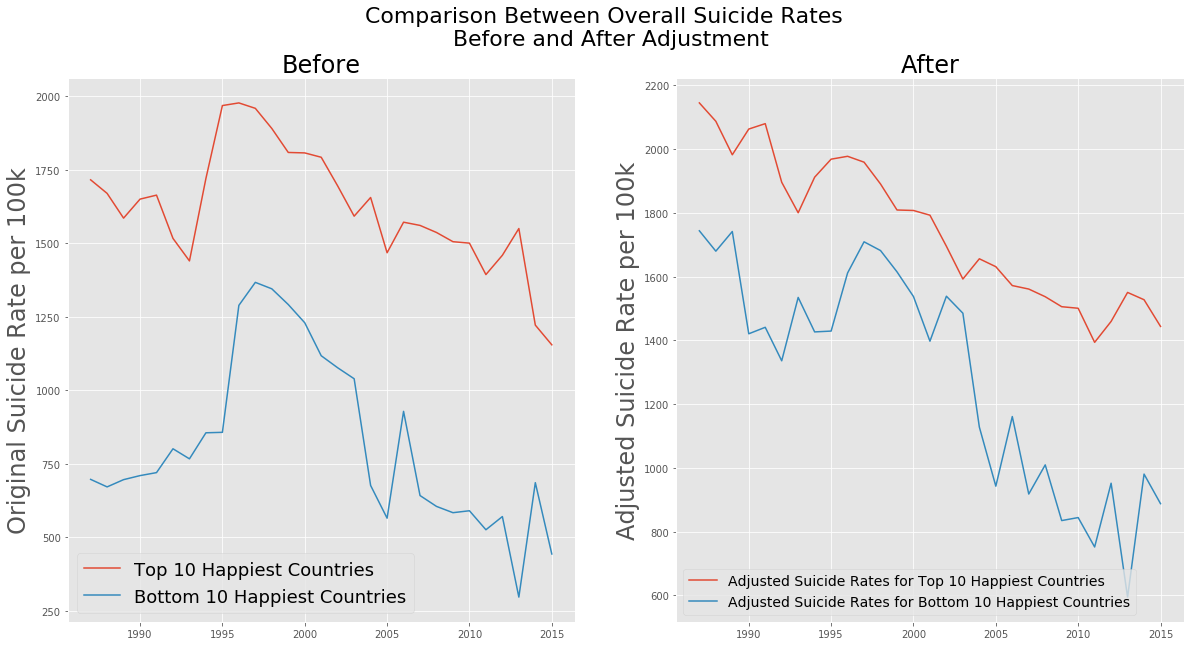

In [69]:
#Side by side with main happiness graph and adjusted graph
#USE#

fig, axs = plt.subplots(1,2, figsize=(20,10))
axs=axs.flatten()
axs[0].plot(top_10_sum['suicides/100k_pop'], label='Top 10 Happiest Countries')
axs[0].plot(bottom_10_sum['suicides/100k_pop'], label='Bottom 10 Happiest Countries')
axs[0].set_title('Before', size=24)
axs[0].set_ylabel("Original Suicide Rate per 100k", size=24)
#axs[0].set_xlabel("Time")
axs[0].legend(fontsize=18)

axs[1].plot(adjusted_top_10_sum['suicides/100k_pop']*top_inflation_constant['suicides/100k_pop'], 
        label='Adjusted Suicide Rates for Top 10 Happiest Countries')
axs[1].plot(adjusted_bottom_10_sum['suicides/100k_pop']*bottom_inflation_constant['suicides/100k_pop'], 
        label='Adjusted Suicide Rates for Bottom 10 Happiest Countries')
axs[1].set_title('After', size=24)
axs[1].set_ylabel("Adjusted Suicide Rate per 100k", size=24)
#axs[1].set_xlabel("Time")
axs[1].legend(fontsize=14)

fig.suptitle('Comparison Between Overall Suicide Rates \n Before and After Adjustment', size=22)
#fig.text(0.04, 0.5, 'Adjusted Suicides Per 100k People', va='center', rotation='vertical', fontsize=16)
plt.savefig('/home/alec/galvanize/capstone/capstone_1/images/before_after_overall_adjustment')

plt.show()